-------------------------------------------------- TOXIC COMMENT CLASSIFICATION ------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.drop(columns=["id"],inplace=True) ## dropping the id column , which is of no use

In [5]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum() ## checking for null values in data

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df.duplicated().sum() ## no duplicate rows

0

In [9]:
df[df["toxic"] == 1]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

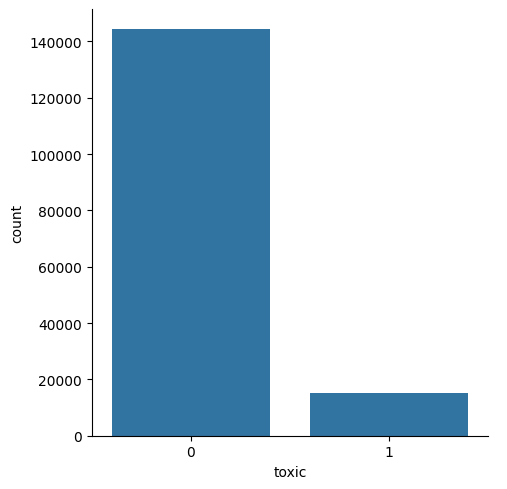

In [21]:
sns.catplot(x="toxic",kind="count",data = df) ##looking at the number of toxic and non-toxic labels

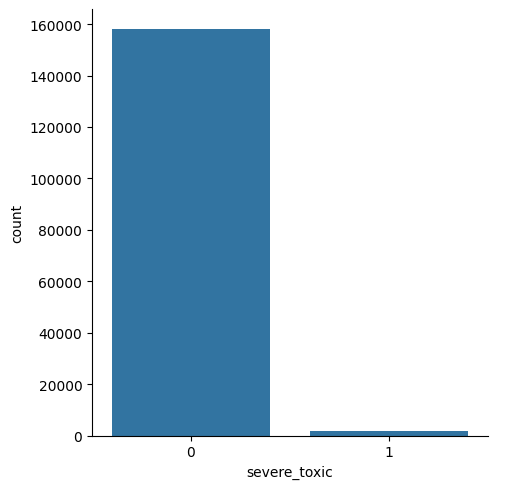

In [23]:
sns.catplot(x="severe_toxic",kind="count",data = df) ##From the graph, we can infer that data is highly imbalanced

In [55]:
graph = {
    "Column":[],
    "0":[],
    "1":[]
}
one_count = []
def create_dataset():
    columns = df.columns.tolist()
    for i in columns:
        if i == "comment_text":
            continue
        L = []
        zero,one = df[i].value_counts()[0],df[i].value_counts()[1]
        one_count.append(one)
        graph["Column"].append(i)
        graph["0"].append(zero)
        graph["1"].append(one)
        
    return graph

In [56]:
data = pd.DataFrame(create_dataset(),columns=["Column","0","1"])

In [57]:
data

,Column,0,1
0,toxic,144277,15294
1,severe_toxic,157976,1595
2,obscene,151122,8449
3,threat,159093,478
4,insult,151694,7877
5,identity_hate,158166,1405


In [60]:
performance_df1 = pd.melt(data, id_vars = "Column")

In [64]:
performance_df1

,Column,variable,value
0,toxic,0,144277
1,severe_toxic,0,157976
2,obscene,0,151122
3,threat,0,159093
4,insult,0,151694
5,identity_hate,0,158166
6,toxic,1,15294
7,severe_toxic,1,1595
8,obscene,1,8449
9,threat,1,478


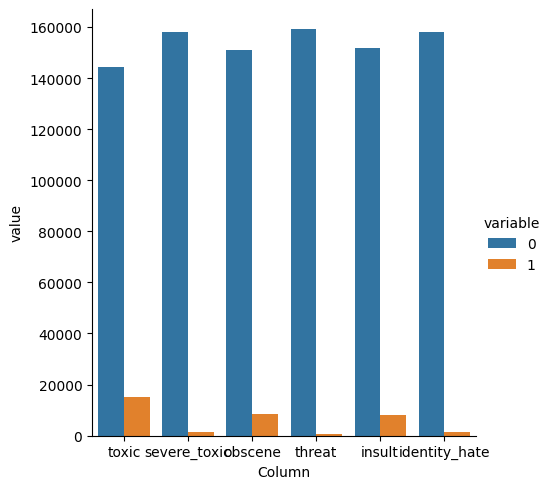

<Figure size 1500x600 with 0 Axes>

In [70]:
##Plot showing the number of true vs false label for every class
sns.catplot(x = 'Column', y='value',
               hue = 'variable',data=performance_df1, kind='bar')
plt.figure(figsize=(15,6))
plt.title("Distribution of Classes among different labelled columns")
print("Zero represents No and One represents Yes")
plt.show()

In [ ]:
##Positive class Distribution of the dataset
columns = df.columns.tolist()
plt.figure(figsize=(15,6))
plt.bar(columns, one_count, color=["red","green","blue","yellow","orange","black"])
plt.xlabel("Columns")
plt.ylabel("Count")
plt.show()

In [86]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\Vikas
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
def count_words(data):
    words = word_tokenize(data)
    return len(words)

def count_sentences(data):
    sent = sent_tokenize(data)
    return len(sent)

In [88]:
df["num_words"] = df["comment_text"].apply(count_words)

In [89]:
df.to_csv("transformed_data.csv",index=False)

In [90]:
df["num_sent"] = df["comment_text"].apply(count_sentences)

In [91]:
df["num_characters"] = df["comment_text"].apply(lambda x : len(x))

In [92]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words,num_sent,num_characters
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,49,3,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,27,4,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,48,3,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,128,4,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,18,2,67
...,...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,63,2,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,19,2,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,15,2,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,26,1,116


In [93]:
## Data Preprocessing
## 1. convert to lowercase
## 2. remove stop words and special characters
## 3. stemming(conversion of similar words to their root words : dance, dancing , danced == dance)

In [94]:
from nltk.corpus import stopwords
nltk.download("stopwords")
import string

[nltk_data] Downloading package stopwords to C:\Users\Vikas
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [96]:
## function for data preprocessing of the comment_text column
def preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = list(y)
  y.clear()

  for i in text:
    if i not in stopwords.words("english"):
      y.append(i)

  text = list(y)
  y.clear()

  for i in text:
    if i not in string.punctuation:
      y.append(i)

  text = list(y)
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)
    

In [97]:
new_df = df

In [98]:
new_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words,num_sent,num_characters
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,49,3,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,27,4,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,48,3,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,128,4,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,18,2,67
...,...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,63,2,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,19,2,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,15,2,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,26,1,116


In [99]:
import sys
sys.setrecursionlimit(10**6)


In [100]:
new_df["transformed_text"] = new_df["comment_text"].apply(preprocessing)

In [102]:
new_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words,num_sent,num_characters,transformed_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,49,3,264,explan edit made usernam hardcor metallica fan...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,27,4,112,match background colour seemingli stuck thank ...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,48,3,233,hey man realli tri edit war guy constantli rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,128,4,622,ca make real suggest improv wonder section sta...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,18,2,67,sir hero chanc rememb page
...,...,...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,63,2,295,second time ask view complet contradict covera...
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,19,2,99,asham horribl thing put talk page
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,15,2,81,spitzer umm there actual articl prostitut ring...
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,26,1,116,look like actual put speedi first version dele...


In [29]:
# df.to_csv("final_dataset.csv")

In [71]:
# final_dataset = pd.read_csv("final_dataset.csv")

In [73]:
# final_dataset = final_dataset.drop(columns=["Unnamed: 0"])

In [103]:
from wordcloud import WordCloud

In [104]:
whole_text = (new_df[new_df["toxic"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)

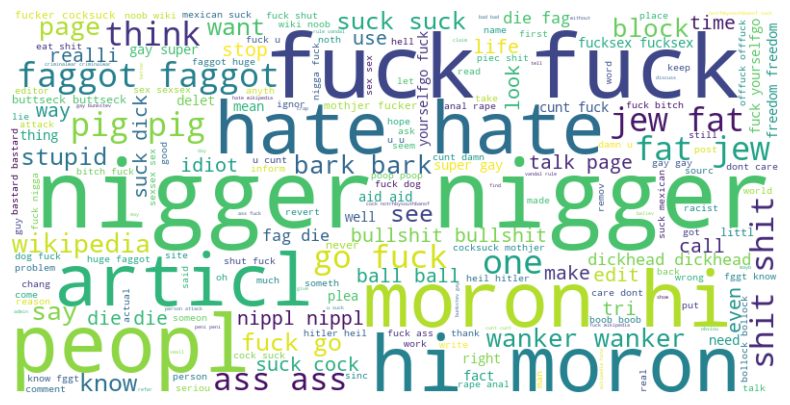

In [105]:
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

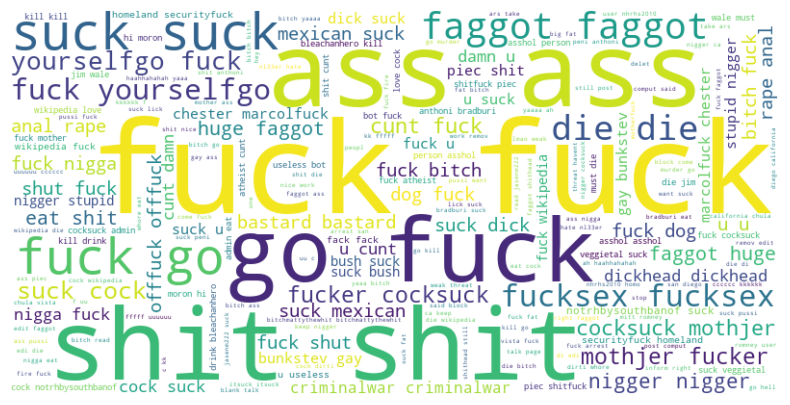

In [106]:
whole_text = (new_df[new_df["severe_toxic"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

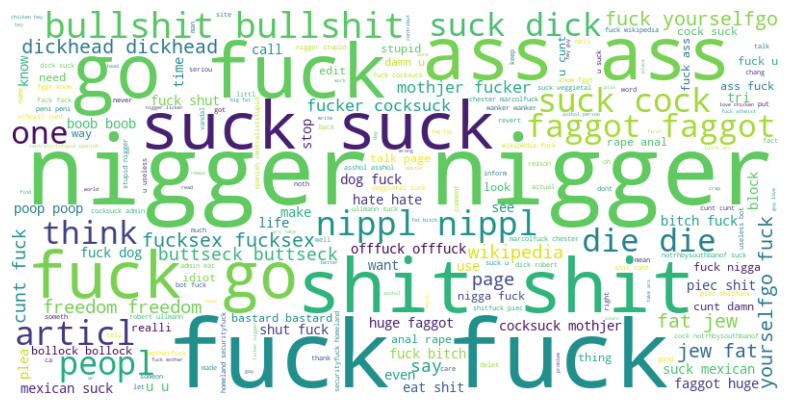

In [107]:
whole_text = (new_df[new_df["obscene"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

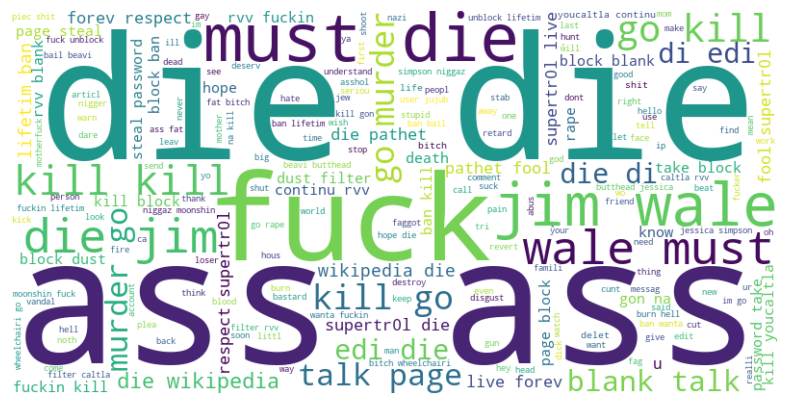

In [108]:
whole_text = (new_df[new_df["threat"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

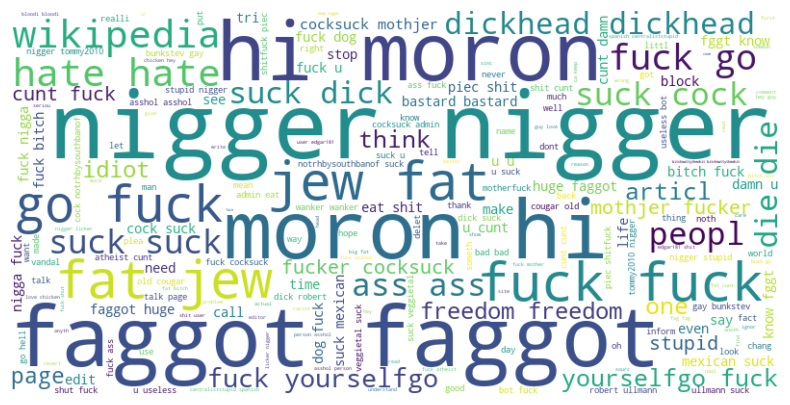

In [109]:
whole_text = (new_df[new_df["insult"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

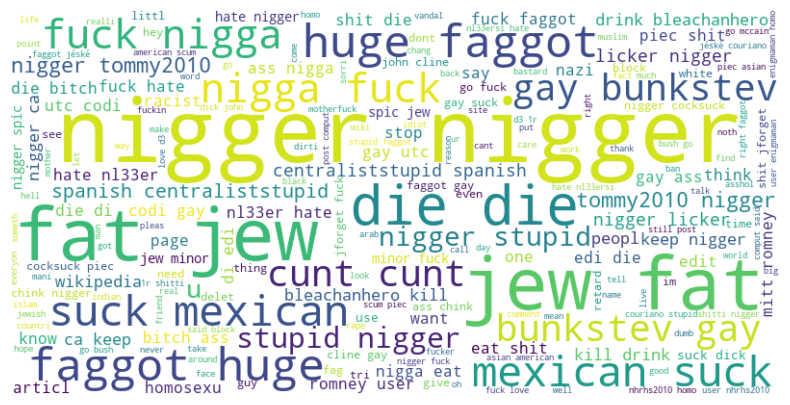

In [110]:
whole_text = (new_df[new_df["identity_hate"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

---------------------------------------------- MODEL BUILDING -------------------------------------------------------------------------------------------

In [111]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=1000) #1000

In [112]:
# final_dataset.info()

In [43]:
# final_dataset.drop(columns=["Unnamed: 0"])
# final_dataset = final_dataset.dropna()

In [113]:
X = tfid.fit_transform(new_df["transformed_text"]).toarray()


In [148]:
query = X[0].reshape(1, -1)
query.shape

(1, 1000)

In [114]:
X.shape

(159571, 1000)

In [115]:
y_toxic = new_df["toxic"].values
y_severe_toxic = new_df["severe_toxic"].values
y_threat = new_df["threat"].values
y_obscene = new_df["obscene"].values
y_identity_hate = new_df["identity_hate"].values
y_insult = new_df["insult"].values


In [ ]:
y_obscene

In [116]:
y = {
    'y_toxic' : y_toxic,
    # 'y_severe_toxic': y_severe_toxic,
    # 'y_threat' : y_threat,
    # 'y_obscene' : y_obscene,
    # 'y_identity_hate' : y_identity_hate,
    # 'y_insult' : y_insult
}

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y_toxic,random_state=2,test_size=0.2)

In [119]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
gb = GaussianNB()
bb = BernoulliNB()
mb = MultinomialNB()

In [153]:
## As dataset is highly imbalanced, we will use f1_score
def train_classifier(clf,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y_toxic,random_state=2,test_size=0.2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    # accuracy = accuracy_score(y_test,y_pred)
    # precision = precision_score(y_test,y_pred)
    score = f1_score(y_test, y_pred, average='weighted')
    prob = clf.predict_proba(query)
    # print("Classes : ",prob.classes_)
    print("Probability : ",prob)
    return score

In [121]:
def train_model(model,X,y):
    for name,Y in y.items():
        print(name)
        score = train_classifier(model,X,Y)
        print("F1_SCORE : ",score)
        return score
        # print("Precision : ",precision)

In [122]:
train_model(mb,X,y)

y_toxic
F1_SCORE :  0.9334470788316804


In [123]:
train_model(bb,X,y)

y_toxic
F1_SCORE :  0.7495439134043518


In [124]:
train_model(gb,X,y)

y_toxic
F1_SCORE :  0.8188188314962054


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='saga', penalty='l2')
rfc = RandomForestClassifier(n_estimators=30, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    # 'SVC' : svc,
    # 'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'xgb':xgb
}

In [129]:
X.shape

(159571, 1000)

In [165]:
from sklearn.model_selection import GridSearchCV

In [ ]:
##Performing the GridSearchCV to gain best parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
X_train, X_test, y_train, y_test = train_test_split(X, y_toxic, test_size=0.2, random_state=2)
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of the Best Model: {:.2f}".format(test_accuracy))

In [162]:
##Training the RandomForest model
train_model(rfc,X,y)

y_toxic
Probability :  [[1. 0.]]
F1_SCORE :  0.9445420266438793


In [163]:
##Training the LinearRegression model
train_model(lrc,X,y)

y_toxic
Probability :  [[0.98789564 0.01210436]]
F1_SCORE :  0.9459589484267202


In [164]:
##Training the MultinomialNaiveBayes Model
train_model(mnb,X,y)

y_toxic
Probability :  [[0.9888213 0.0111787]]
F1_SCORE :  0.9334470788316804


In [ ]:
##Training the DecisionTree Model
train_model(dtc,X,y)

In [167]:
##Training the XGBoost Model
train_model(xgb,X,y)

y_toxic
Probability :  [[0.9784846  0.02151543]]
F1_SCORE :  0.9432520911427956


In [ ]:
##Training the SupportVectorMachine model
train_model(svc,X,y)

In [ ]:
f1_scores = []
algo = []

for name,clf in clfs.items():
#     for y_name,Y in y.items():
#         current_accuracy,current_precision = train_classifier(clf, X, Y)
        
        print("For ",name)
        algo.append(name)
        f1_score = train_model(clf,X,y)
        f1_scores.append(f1_score)

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)],voting='soft')
train_model(voting,X,y)

In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('lrc', lrc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# train_model(stacking,X,y)

In [ ]:
##From the above models, we can see that "Logistic Regression" is performing best on this dataset

In [ ]:
model1 = lrc
model2 = lrc
model3 = lrc
model4 = lrc
model5 = lrc
model6 = lrc


In [ ]:
model1.fit(X, y_toxic)
model2.fit(X, y_severe_toxic)
model4.fit(X, y_threat)
model3.fit(X, y_obscene)
model6.fit(X, y_identity_hate)
model5.fit(X, y_insult)

In [ ]:
def make_prediction(query):
    L = []
    prob1 = model1.predict_proba(query)[1]
    prob2 = model2.predict_proba(query)[1]
    prob3 = model3.predict_proba(query)[1]
    prob4 = model4.predict_proba(query)[1]
    prob5 = model5.predict_proba(query)[1]
    prob6 = model6.predict_proba(query)[1]
    L.append(["toxic", prob1])
    L.append(["severe_toxic", prob2])
    L.append(["obscene", prob3])
    L.append(["threat", prob4])
    L.append(["insult", prob5])
    L.append(["identity_hate", prob6])

    return L

    

In [ ]:
##Prediciting the probabilities of different classes to occur
query = X[0].reshape(1, -1)
probabilities = make_prediction(query)

In [ ]:

for i in probabilities:
    print(i[0]," : ",i[1])